In [5]:
# Cargar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Cargar los archivos
defunciones_clean = pd.read_csv('../defunciones_clean.csv')
cie = pd.read_csv('../CIE.csv')

# Filtrar los códigos de las enfermedades
enfermedades_buscadas = ['Infarto del miocardio', 'Neumonía no especificada', 'Fallecida, sin mención de complicación']
cie_filtrado = cie[cie['descripcion'].str.contains('|'.join(enfermedades_buscadas), case=False, na=False)]

# Extraer los códigos de las enfermedades relacionadas
codigos_enfermedades = cie_filtrado['codigo'].tolist()

# Filtrar el dataset de defunciones por los códigos encontrados
defunciones_clean_filtrado = defunciones_clean[defunciones_clean['causa'].isin(codigos_enfermedades)]

# Limpiar las columnas no necesarias o irrelevantes (puedes ajustar según lo necesario)
defunciones_clean_filtrado = defunciones_clean_filtrado.dropna(subset=['edad', 'sexo', 'año_registrado', 'causa'])

# Convertir las variables categóricas a numéricas (si es necesario)
label_encoder = LabelEncoder()
defunciones_clean_filtrado['sexo'] = label_encoder.fit_transform(defunciones_clean_filtrado['sexo'])
defunciones_clean_filtrado['causa'] = label_encoder.fit_transform(defunciones_clean_filtrado['causa'])

# Crear las variables X (predictoras) e y (respuesta)
X = defunciones_clean_filtrado[['sexo', 'edad', 'año_registrado']]  # Asegúrate de usar las variables correctas
y = defunciones_clean_filtrado['causa']

# Particionar los datos en diferentes proporciones
# 70% entrenamiento, 30% prueba
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.30, random_state=42)
# 80% entrenamiento, 20% prueba
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.20, random_state=42)
# 85% entrenamiento, 15% prueba
X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(X, y, test_size=0.15, random_state=42)

# Inicializar el clasificador Naive Bayes
naive_bayes = GaussianNB()

# Entrenar y evaluar el modelo para cada partición
def evaluar_modelo(X_train, X_test, y_train, y_test):
    naive_bayes.fit(X_train, y_train)
    y_pred = naive_bayes.predict(X_test)
    return classification_report(y_test, y_pred)

# Evaluar con las diferentes particiones
resultado_70_30 = evaluar_modelo(X_train_70, X_test_70, y_train_70, y_test_70)
resultado_80_20 = evaluar_modelo(X_train_80, X_test_80, y_train_80, y_test_80)
resultado_85_15 = evaluar_modelo(X_train_85, X_test_85, y_train_85, y_test_85)

# Mostrar los resultados
print("Resultado 70/30:")
print(resultado_70_30)
print("\nResultado 80/20:")
print(resultado_80_20)
print("\nResultado 85/15:")
print(resultado_85_15)


C:\Users\Silvia\AppData\Local\Temp\ipykernel_21052\1220278405.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones_clean = pd.read_csv('../defunciones_clean.csv')


Resultado 70/30:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Resultado 80/20:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Resultado 85/15:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\Silvia\AppData\Local\Temp\ipykernel_21052\1165092721.py:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones_clean = pd.read_csv('../defunciones_clean.csv')


Resultado 70/30 Naive Bayes:
              precision    recall  f1-score   support

          38       0.38      0.28      0.32     10052
          56       0.40      0.40      0.40     10160
          58       0.48      0.62      0.54     10011

    accuracy                           0.43     30223
   macro avg       0.42      0.43      0.42     30223
weighted avg       0.42      0.43      0.42     30223

Matriz de Confusión 70/30 Naive Bayes:
[[2767 3921 3364]
 [2775 4112 3273]
 [1671 2164 6176]]


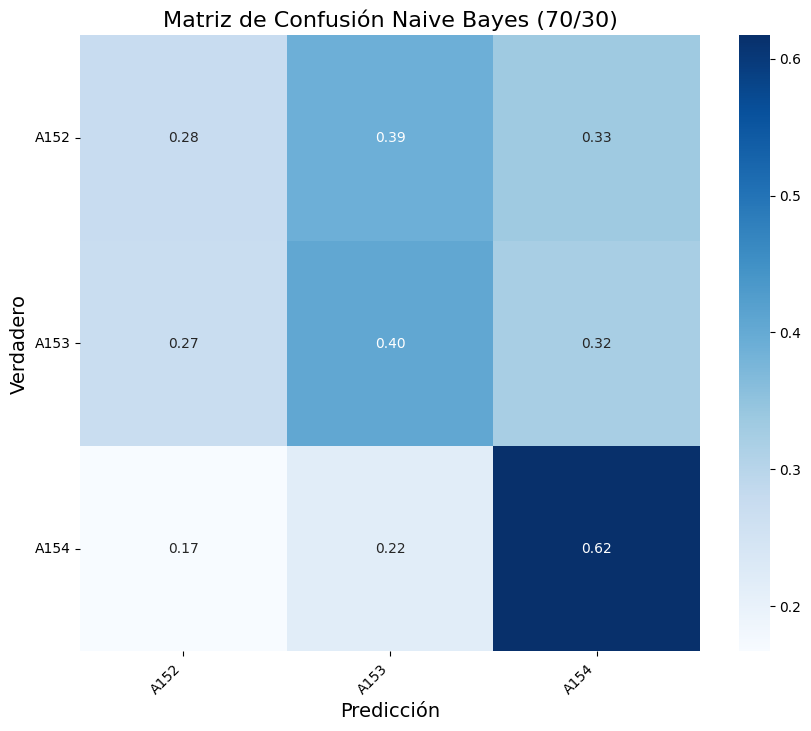

Resultado 80/20 Naive Bayes:
              precision    recall  f1-score   support

          38       0.39      0.26      0.31      6727
          56       0.40      0.41      0.41      6793
          58       0.48      0.62      0.54      6629

    accuracy                           0.43     20149
   macro avg       0.42      0.43      0.42     20149
weighted avg       0.42      0.43      0.42     20149

Matriz de Confusión 80/20 Naive Bayes:
[[1765 2741 2221]
 [1744 2813 2236]
 [1056 1453 4120]]


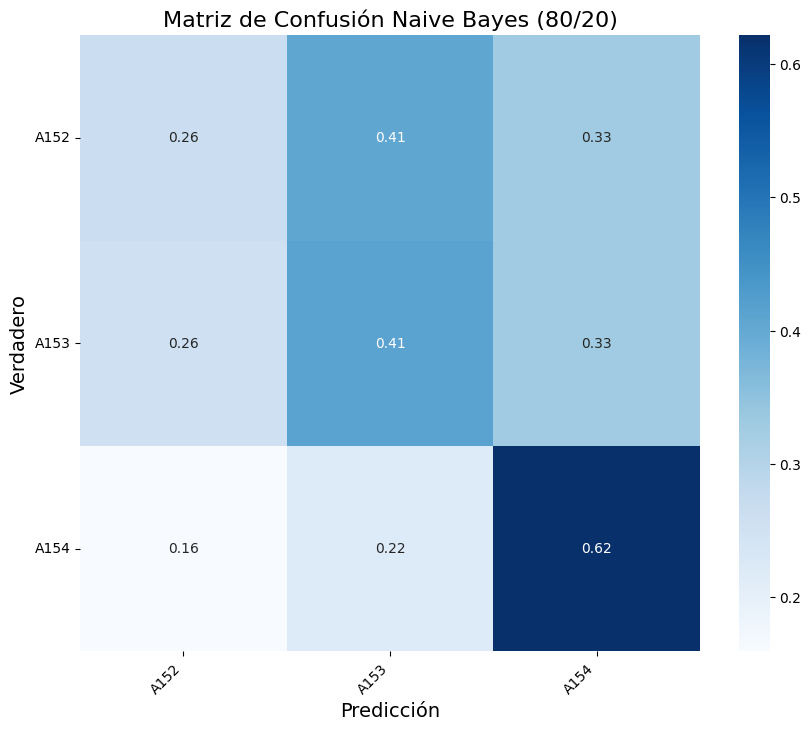

Resultado 85/15 Naive Bayes:
              precision    recall  f1-score   support

          38       0.39      0.27      0.32      5028
          56       0.40      0.41      0.41      5099
          58       0.48      0.62      0.54      4985

    accuracy                           0.43     15112
   macro avg       0.42      0.43      0.42     15112
weighted avg       0.42      0.43      0.42     15112

Matriz de Confusión 85/15 Naive Bayes:
[[1345 2035 1648]
 [1333 2112 1654]
 [ 799 1109 3077]]


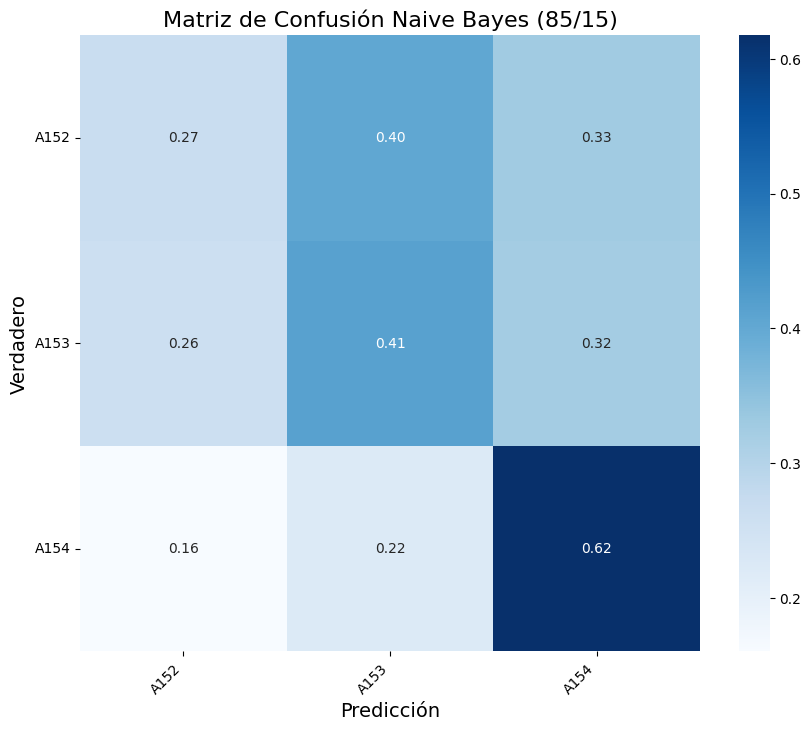

In [29]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Cargar los archivos CSV
defunciones_clean = pd.read_csv('../defunciones_clean.csv')
cie = pd.read_csv('../CIE.csv')

# Ampliar el filtro de enfermedades a otras más comunes
enfermedades_buscadas = [
    'Infarto del miocardio', 'Neumonía no especificada', 'Fallecida, sin mención de complicación',
    'Hipertensión', 'Diabetes mellitus', 'Enfermedades cerebrovasculares', 'Cáncer', 'Tuberculosis'
]
cie_filtrado = cie[cie['descripcion'].str.contains('|'.join(enfermedades_buscadas), case=False, na=False)]

# Extraer los códigos de las enfermedades relacionadas
codigos_enfermedades = cie_filtrado['codigo'].tolist()

# Filtrar el dataset de defunciones por los códigos encontrados
defunciones_clean_filtrado = defunciones_clean[defunciones_clean['causa'].isin(codigos_enfermedades)]

# Limpiar las columnas no necesarias o irrelevantes
defunciones_clean_filtrado = defunciones_clean_filtrado.dropna(subset=['edad', 'sexo', 'año_registrado', 'causa'])

# Reemplazar los valores de edad atípicos (999 por la mediana)
defunciones_clean_filtrado['edad'] = defunciones_clean_filtrado['edad'].replace(999, defunciones_clean_filtrado['edad'].median())

# Convertir las variables categóricas a numéricas
label_encoder = LabelEncoder()
defunciones_clean_filtrado['sexo'] = label_encoder.fit_transform(defunciones_clean_filtrado['sexo'])
defunciones_clean_filtrado['causa'] = label_encoder.fit_transform(defunciones_clean_filtrado['causa'])

# Crear las variables X (predictoras) e y (respuesta)
X = defunciones_clean_filtrado[['sexo', 'edad', 'año_registrado']]  # Asegúrate de usar las variables correctas
y = defunciones_clean_filtrado['causa']

# Filtrar las tres enfermedades más frecuentes en la variable 'causa'
top_3_enfermedades = y.value_counts().nlargest(3).index
X_top_3 = X[y.isin(top_3_enfermedades)]
y_top_3 = y[y.isin(top_3_enfermedades)]

# Aplicar SMOTE solo si hay más de una clase
if len(pd.Series(y_top_3).value_counts()) > 1:
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
    X_resampled, y_resampled = smote.fit_resample(X_top_3, y_top_3)

    # Escalar las características numéricas
    scaler = StandardScaler()
    X_resampled = scaler.fit_transform(X_resampled)

    # Inicializar el clasificador Naive Bayes
    naive_bayes = GaussianNB()

    # Función para evaluar el modelo con particiones y validación cruzada
    def evaluar_modelo(X_train, X_test, y_train, y_test, partition_name):
        # Entrenar el modelo
        naive_bayes.fit(X_train, y_train)
        y_pred = naive_bayes.predict(X_test)
        
        # Evaluación del modelo
        print(f"Resultado {partition_name} Naive Bayes:")
        print(classification_report(y_test, y_pred))

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        print(f"Matriz de Confusión {partition_name} Naive Bayes:")
        print(cm)

        # Normalizar la matriz de confusión para una mejor visualización
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalización por filas

        # Graficar la matriz de confusión con una escala adecuada
        plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True, 
                    xticklabels=label_encoder.classes_[:3], 
                    yticklabels=label_encoder.classes_[:3], annot_kws={"size": 10})  # Ajustar la escala

        # Mejorar la visualización de la matriz de confusión
        plt.title(f"Matriz de Confusión Naive Bayes ({partition_name})", fontsize=16)
        plt.xlabel('Predicción', fontsize=14)
        plt.ylabel('Verdadero', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.show()

    # Evaluar el modelo en las tres particiones
    partitions = {
        "70/30": (0.30, "70/30"),
        "80/20": (0.20, "80/20"),
        "85/15": (0.15, "85/15")
    }

    # Evaluar el modelo en las particiones
    for partition_name, (test_size, display_name) in partitions.items():
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42)
        evaluar_modelo(X_train, X_test, y_train, y_test, display_name)

else:
    print("Error: Después del filtrado, solo hay una clase, no se puede aplicar SMOTE.")
